In [1]:
!pip install visualkeras


In [17]:
import os
import pickle
import numpy as np
import pandas as pd
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, concatenate
from tensorflow.keras.initializers import HeUniform, GlorotUniform
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import visualkeras

In [14]:
num_classes = 10

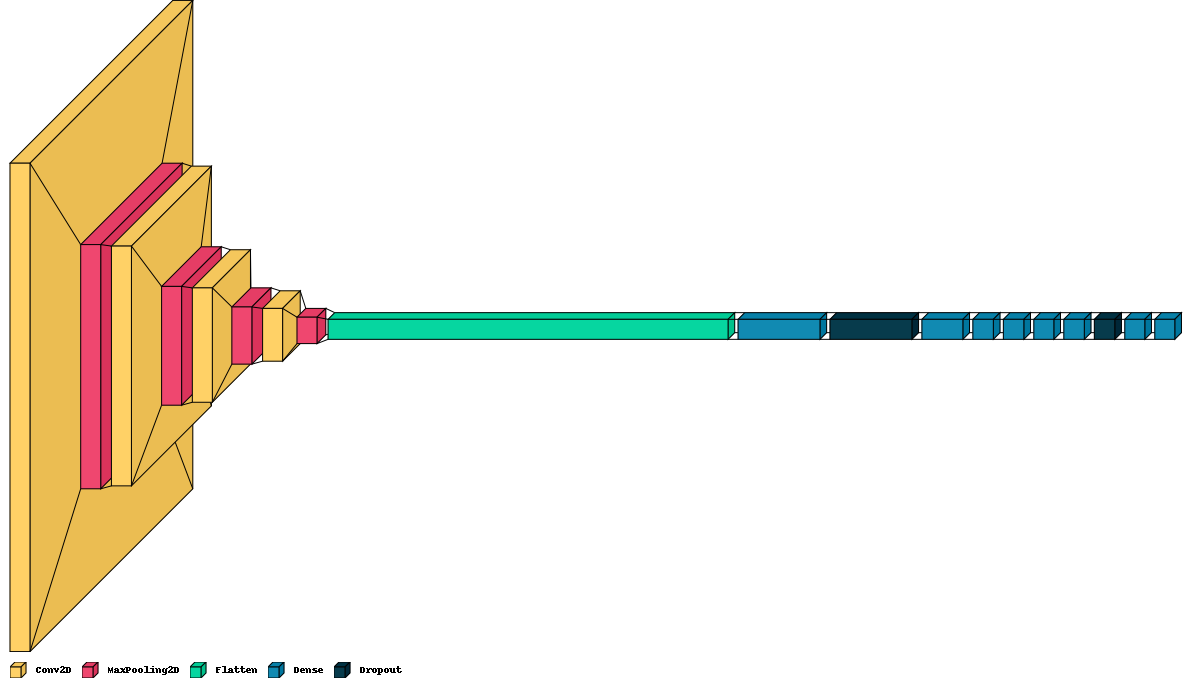

In [15]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

# Visualize the model with labels and smaller size
visualkeras.layered_view(model, legend=True, scale_xy=2.2, scale_z=0.08)

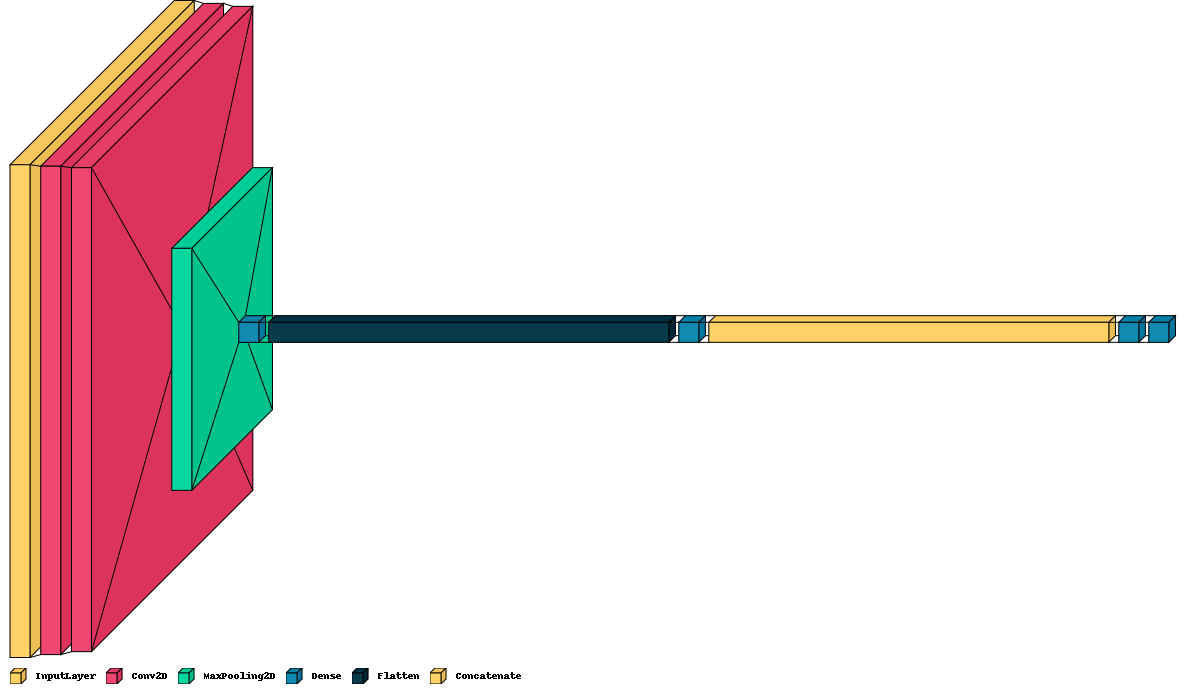

In [18]:
# Create the model
# Define the image input shape
image_input = Input(shape=(224, 224, 3), name='image_input')
# Convolutional layers for image processing
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten1 = Flatten()(pool1)

# Define the numerical input shape
numerical_input = Input(shape=(166,), name='numerical_input')
# Fully connected layers for numerical data processing
dense1 = Dense(64, activation='relu')(numerical_input)
dense2 = Dense(32, activation='relu')(dense1)

# Concatenate the outputs from image and numerical processing
concatenated = concatenate([flatten1, dense2])

# Final fully connected layers for joint learning
dense3 = Dense(64, activation='relu')(concatenated)
output = Dense(num_classes, activation='softmax')(dense3)

# Create the model
model = Model(inputs=[image_input, numerical_input], outputs=output)

# Visualize the model with labels and smaller size
visualkeras.layered_view(model, legend=True, scale_xy=2.2, scale_z=0.08)